In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name()}")

CUDA available: True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [3]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    os.chdir(project_root)

#### Data loading

In [4]:
import pandas as pd

from paths import DATA_DIR

df = pd.read_csv(DATA_DIR / "customer_support_emails_dataset.csv", index_col=0)

df.head()

,subject,body,department
0,Blinking lights on Emberton II,"Hey, so my Marshall Emberton II is doing this ...",Tech Support
1,My Sony speaker isn't working properly?,"Dear Support Team,\n\nI hope this email finds ...",Tech Support
2,Speaker keeps disconnecting,"Hi, I have a Sony SRS-XG300 and it keeps disco...",Tech Support
3,Hello there! Quick question about waterproofin...,"Dear wonderful support team,\n\nI hope this em...",Tech Support
4,AirPods Pro not working after update?,"Hi there, I have the AirPods Pro 2nd gen and a...",Tech Support


#### Department distribution

<Axes: xlabel='department'>

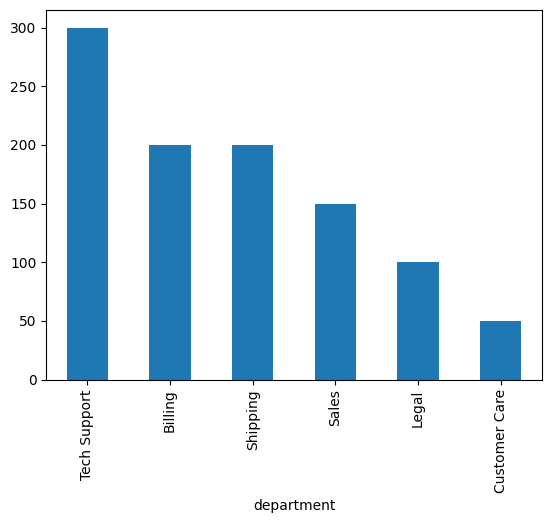

In [5]:
df["department"].value_counts().plot(kind="bar")

#### Basic analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     1000 non-null   object
 1   body        1000 non-null   object
 2   department  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [7]:
df.describe()

,subject,body,department
count,1000,1000,1000
unique,942,1000,6
top,Why was I charged after canceling?,"Hey, so I was trying to log in and it's not wo...",Tech Support
freq,6,1,300


#### Missing values 

In [8]:
print("Missing values percentage:")
print(df.isna().sum() / len(df) * 100)

Missing values percentage:
subject       0.0
body          0.0
department    0.0
dtype: float64


In [9]:
print("length stats of subject:")

df["subject"].fillna("").apply(len).describe()

length stats of subject:


count    1000.000000
mean       43.533000
std        16.310025
min         6.000000
25%        31.000000
50%        43.000000
75%        55.000000
max        99.000000
Name: subject, dtype: float64

#### Length stats

In [10]:
print("length stats of body:")

df["body"].fillna("").apply(len).describe()

length stats of body:


count    1000.00000
mean      367.94700
std       146.08698
min        65.00000
25%       272.00000
50%       339.00000
75%       422.00000
max      1268.00000
Name: body, dtype: float64

#### Sanity check

In [11]:
random_samples = df.sample(n=5, random_state=42)

for idx, row in random_samples.iterrows():
    print(f"\n{'=' * 80}")
    print(f"Sample {idx}:")
    print(f"Department: {row['department']}")
    print("\nSubject:")
    print(f"{row['subject']}")
    print("\nBody:")
    print(f"{row['body']}")
    print(f"{'=' * 80}")


Sample 521:
Department: Shipping

Subject:
Where is my Soundcore speaker??

Body:
Hey, I ordered a Motion X600 weeks ago and it's still not here. Tracking says it's stuck somewhere. I'm in Sweden and this is taking way too long. Had a terrible week and now this?? Need this fixed ASAP, what's going on?

Sample 737:
Department: Legal

Subject:
Need help with my speaker issue

Body:
Hi there, I was really excited to use my new speaker at a party last weekend, but it stopped working out of nowhere. It totally killed the vibe and I'm pretty upset. I don't know what happened, but I feel like I should get a replacement or something. Can you help me figure this out? Thanks.

Sample 740:
Department: Legal

Subject:
Delete my account NOW

Body:
I’ve been a loyal customer for years and never had this kind of issue before. I want my account removed IMMEDIATELY. I can't find how to do it myself and your website is useless. If this isn't sorted by the end of the week, I'm taking legal action. Don't

#### Wordcloud

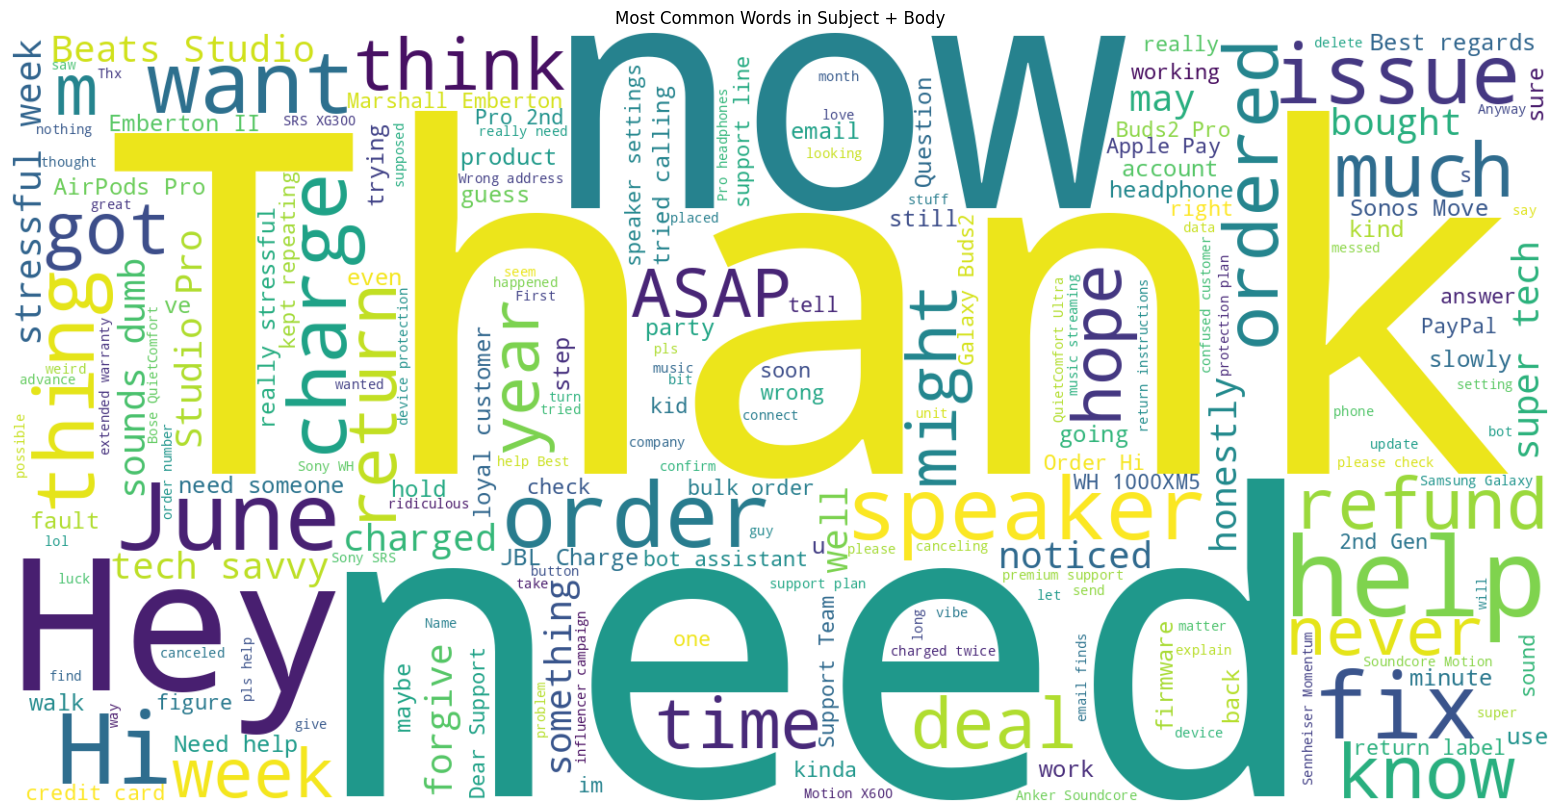

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

prompt = " ".join(df["subject"].fillna("") + " " + df["body"].fillna(""))

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(prompt)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Subject + Body")
plt.show()
